# Handwritten digits recognition

In [1]:
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


# Load and Process data

In [9]:
# load train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape data as per the needs
X_train = X_train.reshape(60000,28,28,1) / 255
X_test = X_test.reshape(10000,28,28,1) / 255

# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


# Convolution Neural Network Model

In [7]:
# Define the model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model using accuracy metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and Save the model

In [5]:
# train and save the model     
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)
model.save('handwritten_digits.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 25s 418us/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.0523 - val_accuracy: 0.9824
Epoch 2/3
60000/60000 [==============================] - 23s 380us/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 3/3
60000/60000 [==============================] - 22s 375us/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9883


# Testing the model

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


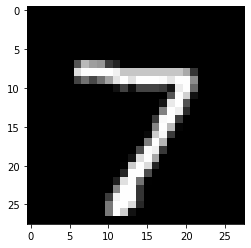

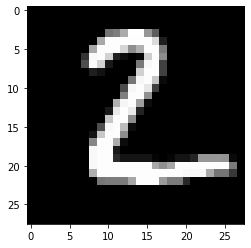

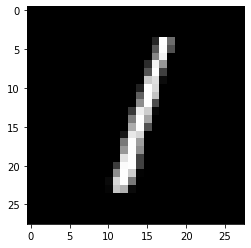

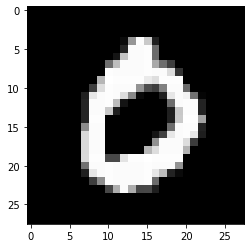

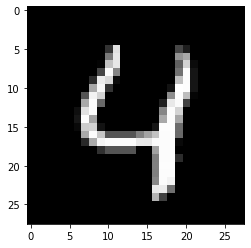

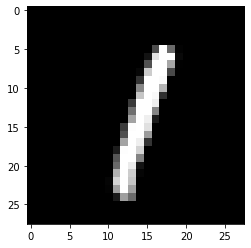

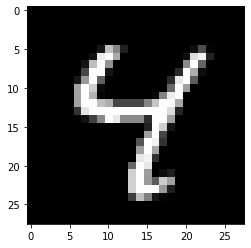

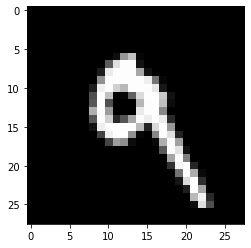

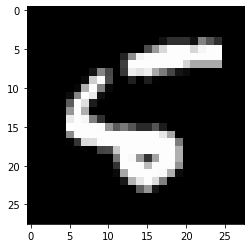

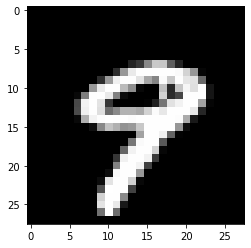

In [6]:
# load the trained model
mod = load_model('handwritten_digits.h5')

n = 10 # test size

# do predictions
predictions = mod.predict(X_test[:n])
print(np.argmax(predictions,axis = 1))
print(np.argmax(y_test[:n],axis = 1))

for i in range(0,10):
  first_image = X_test[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.show()
